# importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.duplicated().sum()

240

In [8]:
df.loc[df.duplicated(), :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [12]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>,
        <AxesSubplot:xlabel='citric acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='volatile acidity'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='citric acid'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='citric acid'>,
        <AxesSubplot:xlabel='citric acid', ylabel='citric acid'>,
        <AxesSubplot:xlabel='sulphates', ylabel='citric acid'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='sulphates'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='sulphates'>,
        <AxesSubplot:xlabel='citric acid', ylabel='sulphates'>,
        <Ax

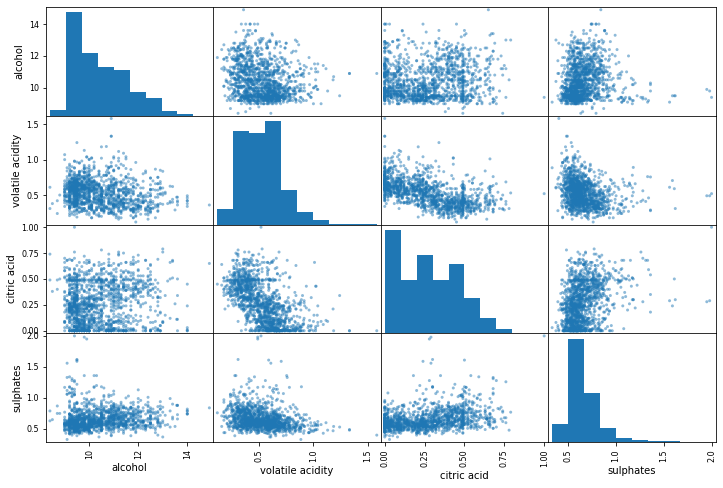

In [13]:
attributes = ["alcohol", "volatile acidity", "citric acid", "sulphates"]
scatter_matrix(df[attributes], figsize = (12,8))

In [14]:
X=df.drop('quality',axis=1)

In [15]:
y=df.quality

In [16]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0 )

In [17]:
##setting good quality wine level as score 7 or above

In [18]:
y.value_counts()

0    1175
1     184
Name: quality, dtype: int64

# oversampling to balance the dataset using SMOTE

In [19]:
#over sampling
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X,y)

In [20]:
y_res.value_counts()

0    1175
1    1175
Name: quality, dtype: int64

In [21]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=.2,random_state =42)

In [24]:
X_train.shape, y_train.shape

((1880, 11), (1880,))

In [25]:
X_test.shape, y_test.shape

((470, 11), (470,))

In [26]:
y_train.value_counts(),y_test.value_counts()

(0    943
 1    937
 Name: quality, dtype: int64,
 1    238
 0    232
 Name: quality, dtype: int64)

# Build Classification Models

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Defining learning classifiers

In [28]:
names = ['SGDClassifier()',
               'DecisionTreeClassifier()',
               'RandomForestClassifier()',
               'XGBClassifier()',
               'KNeighborsClassifier(n_neighbors=1)']

classifiers = [SGDClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               XGBClassifier(),
               KNeighborsClassifier(n_neighbors=1)]

In [29]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

[16:48:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
scores

[0.6276595744680851,
 0.8276595744680851,
 0.9148936170212766,
 0.9191489361702128,
 0.8872340425531915]

In [31]:
df2 = pd.DataFrame()
df2['name'] = names
df2['score'] = scores
df2.sort_values('score')

,name,score
0,SGDClassifier(),0.627660
1,DecisionTreeClassifier(),0.827660
4,KNeighborsClassifier(n_neighbors=1),0.887234
2,RandomForestClassifier(),0.914894
3,XGBClassifier(),0.919149


# comparing two best models

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
score1=cross_val_score(RandomForestClassifier(),X_res,y_res,cv=10)

In [34]:
score1

array([0.9106383 , 0.91914894, 0.90212766, 0.8893617 , 0.9787234 ,
       0.91489362, 0.86808511, 0.85531915, 0.93617021, 0.89787234])

In [35]:
score1.mean()

0.9072340425531916

In [36]:
from xgboost import XGBClassifier

In [37]:
score2=cross_val_score(XGBClassifier(),X_res,y_res,cv=10)

[16:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [38]:
score2

array([0.88510638, 0.92765957, 0.92765957, 0.89361702, 0.9787234 ,
       0.90212766, 0.88085106, 0.89787234, 0.94893617, 0.89361702])

In [39]:
score2.mean()

0.9136170212765957

# Hyperparameter tuning

In [40]:
params={
 "learning_rate"    : [0.15, 0.30 ] ,
 "max_depth"        : [ 6, 10],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.3 ]
    
}

In [41]:
model=XGBClassifier()

In [42]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [43]:
#hypersearch=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [44]:
hypersearch=GridSearchCV(model,param_grid=params,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [45]:
hypersearch.fit(X_res,y_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[16:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [46]:
tunedmodel=hypersearch.best_estimator_

In [47]:
hypersearch.best_params_

{'gamma': 0.0, 'learning_rate': 0.3, 'max_depth': 10, 'min_child_weight': 1}

In [48]:
##since XGB classifier performs the best we will choose it to make our model

In [49]:
model2=tunedmodel

# checking model accuracy

In [50]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(model2, X_train, y_train, cv=10)

[16:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [51]:
y_train_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [52]:
s=lambda y_value: 1 if y_value>=0.7 else 0
y_train_pred=np.array([s(x) for x in y_train_pred])

In [53]:
y_train_pred

array([1, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[838, 105],
       [ 37, 900]], dtype=int64)

In [55]:
from sklearn.metrics import precision_score, recall_score
ps=precision_score(y_train, y_train_pred)
ps #precision score

0.8955223880597015

In [56]:
rs=recall_score(y_train, y_train_pred)
rs #recall score

0.96051227321238

In [57]:
f1=2*((ps*rs)/(ps+rs))
f1 #f1 score

0.9268795056642636

In [58]:
model2.fit(X_train,y_train)

[16:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
## finally checking the score of the model on test set

In [60]:
result=model2.score(X_test, y_test)
print(result)

0.9234042553191489


In [61]:
from sklearn import metrics

In [62]:
print(metrics.confusion_matrix(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred,digits=3))

[[838 105]
 [ 37 900]]
              precision    recall  f1-score   support

           0      0.958     0.889     0.922       943
           1      0.896     0.961     0.927       937

    accuracy                          0.924      1880
   macro avg      0.927     0.925     0.924      1880
weighted avg      0.927     0.924     0.924      1880



# Pickling the model

In [63]:
data = [[8,0.4,0.4,3,0.07,8,20,0.9950,3.2,0.7,11]]

In [64]:
inputdf = pd.DataFrame(data, columns=['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])

In [65]:
inputdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,8,0.4,0.4,3,0.07,8,20,0.995,3.2,0.7,11


In [66]:
model2.predict(inputdf)

array([1], dtype=int64)

In [67]:
#pickle.dump(model2, open('wine_quality_model.pkl', 'wb'))

In [68]:
#modelcheck=pickle.load(open('wine_quality_model.pkl','rb'))

In [69]:
#prediction=modelcheck.predict(inputdf)

In [70]:
#prediction[0]